In [147]:
%matplotlib inline
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [119]:
#reading Data

df = pd.read_csv('C:\\Users\\91830\\OneDrive\\Desktop\\Project\\ds_salaries.csv')
print(df.shape)
df.head()

(607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [120]:
print("#data set of data sci:" + str (len(df.index)))

#data set of data sci:607


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


<Axes: xlabel='job_title', ylabel='count'>

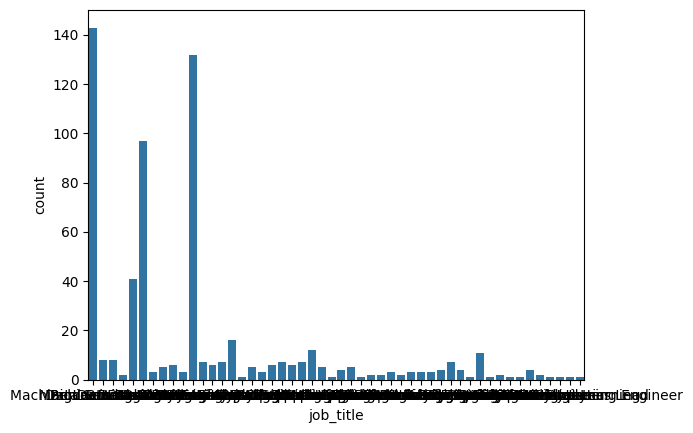

In [122]:
sns.countplot(x ="job_title" , data= df)

<Axes: ylabel='Frequency'>

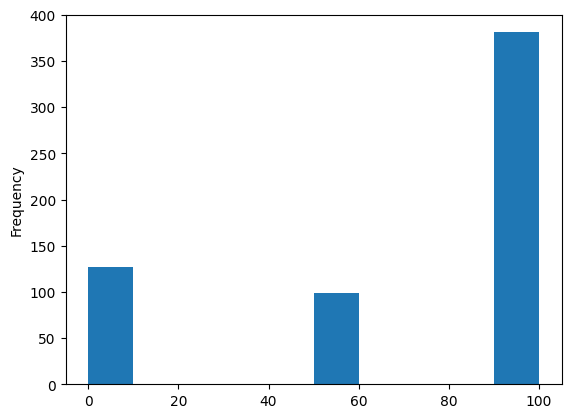

In [123]:
df["remote_ratio"].plot.hist()

<Axes: xlabel='work_year', ylabel='count'>

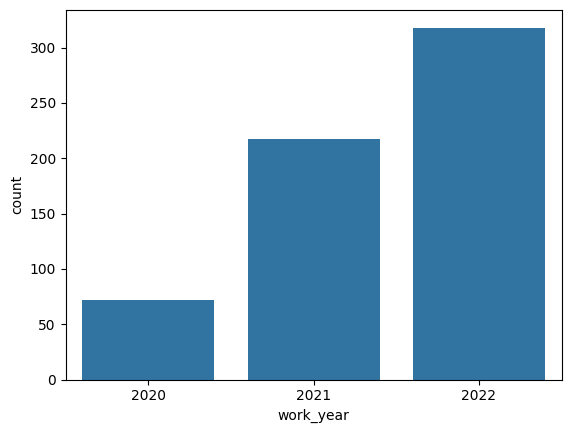

In [124]:
#Analyzing Data
sns.countplot(x ="work_year", data= df)


<Axes: xlabel='work_year', ylabel='count'>

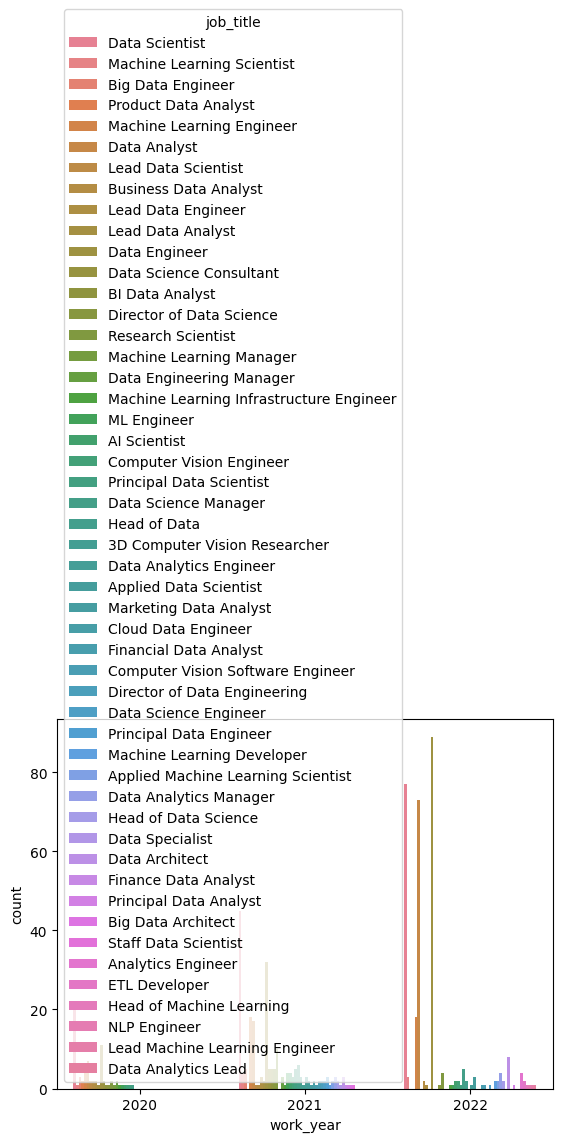

In [125]:
sns.countplot(x="work_year", hue = "job_title", data =df)

<Axes: xlabel='work_year', ylabel='count'>

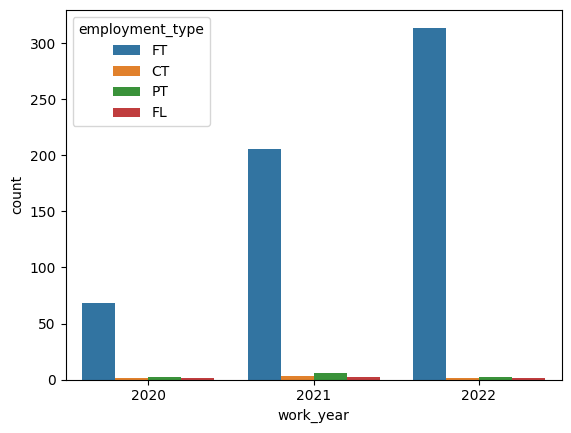

In [126]:
sns.countplot(x = "work_year",hue="employment_type",data=df)

In [127]:
df.isnull()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='company_size', ylabel='work_year'>

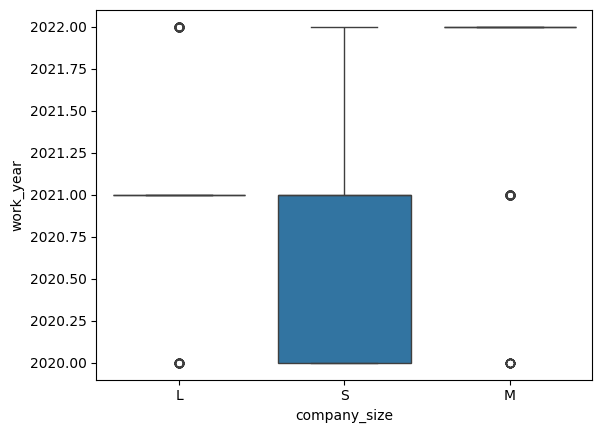

In [128]:
sns.boxplot(x ="company_size", y ="work_year",data=df)

In [129]:
#drop
df.drop("employment_type",axis = 1, inplace =True)
df.head()


,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [130]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [131]:
df.head(5)

,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [132]:
pd.get_dummies(df['salary_currency'])


,AUD,BRL,CAD,CHF,CLP,CNY,DKK,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [133]:
location = pd.get_dummies(df['company_location'],drop_first =True)

In [134]:
df.head()

,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [135]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


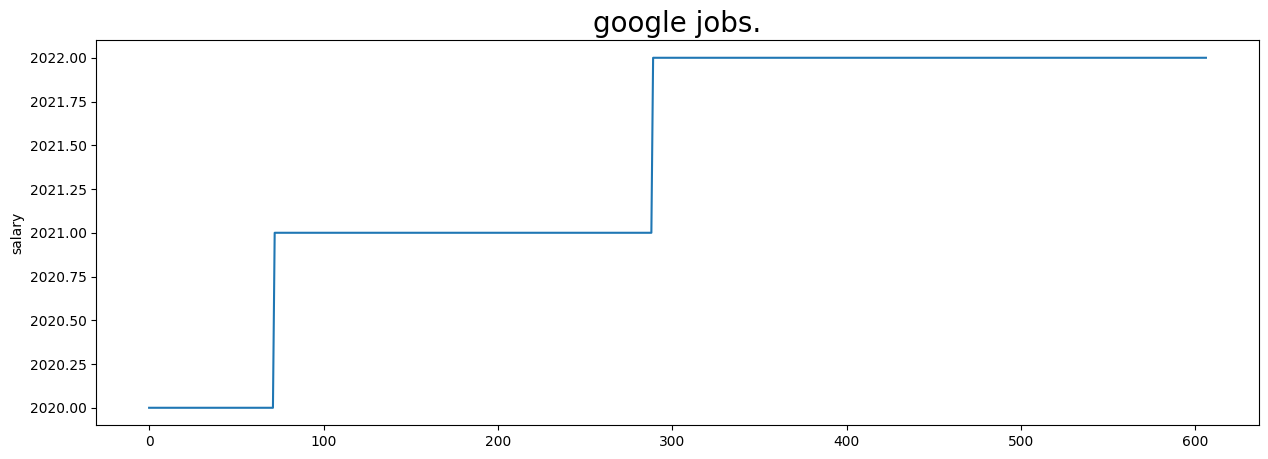

In [136]:
plt.figure(figsize=(15,5))
plt.plot(df['work_year'])
plt.title('google jobs.', fontsize = 20)
plt.ylabel('salary')
plt.show()

In [137]:
df.head()

,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [138]:
df[df['salary']==df['salary_currency']].shape

(0, 11)

In [139]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [148]:
import seaborn as sb

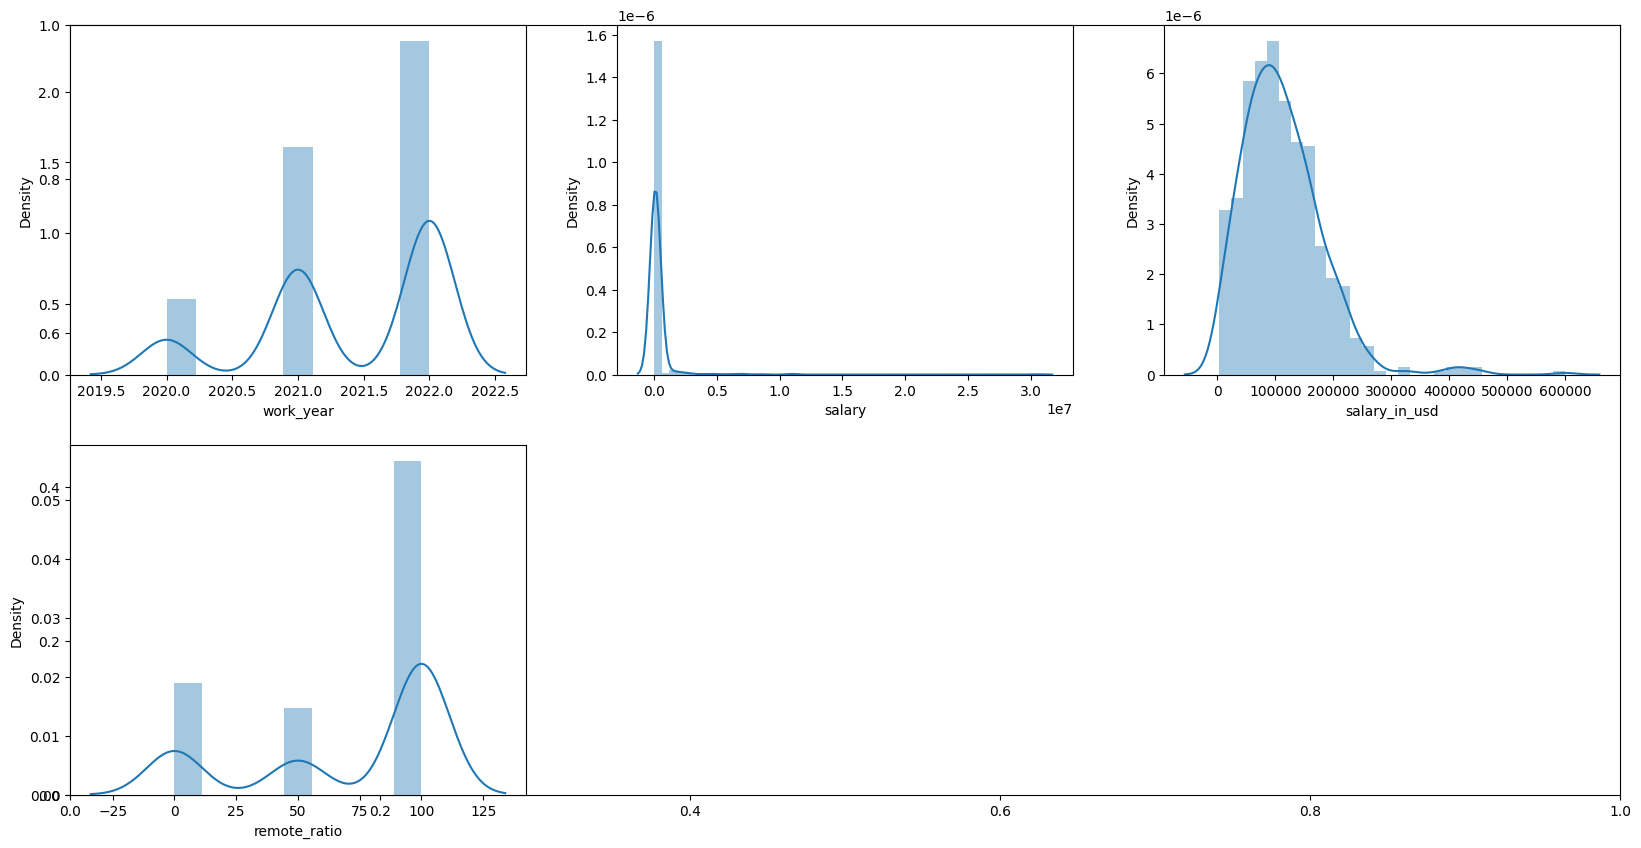

In [161]:
features =['work_year','salary','salary_in_usd','remote_ratio']
plt.subplots(figsize=(20,10))

for i , col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

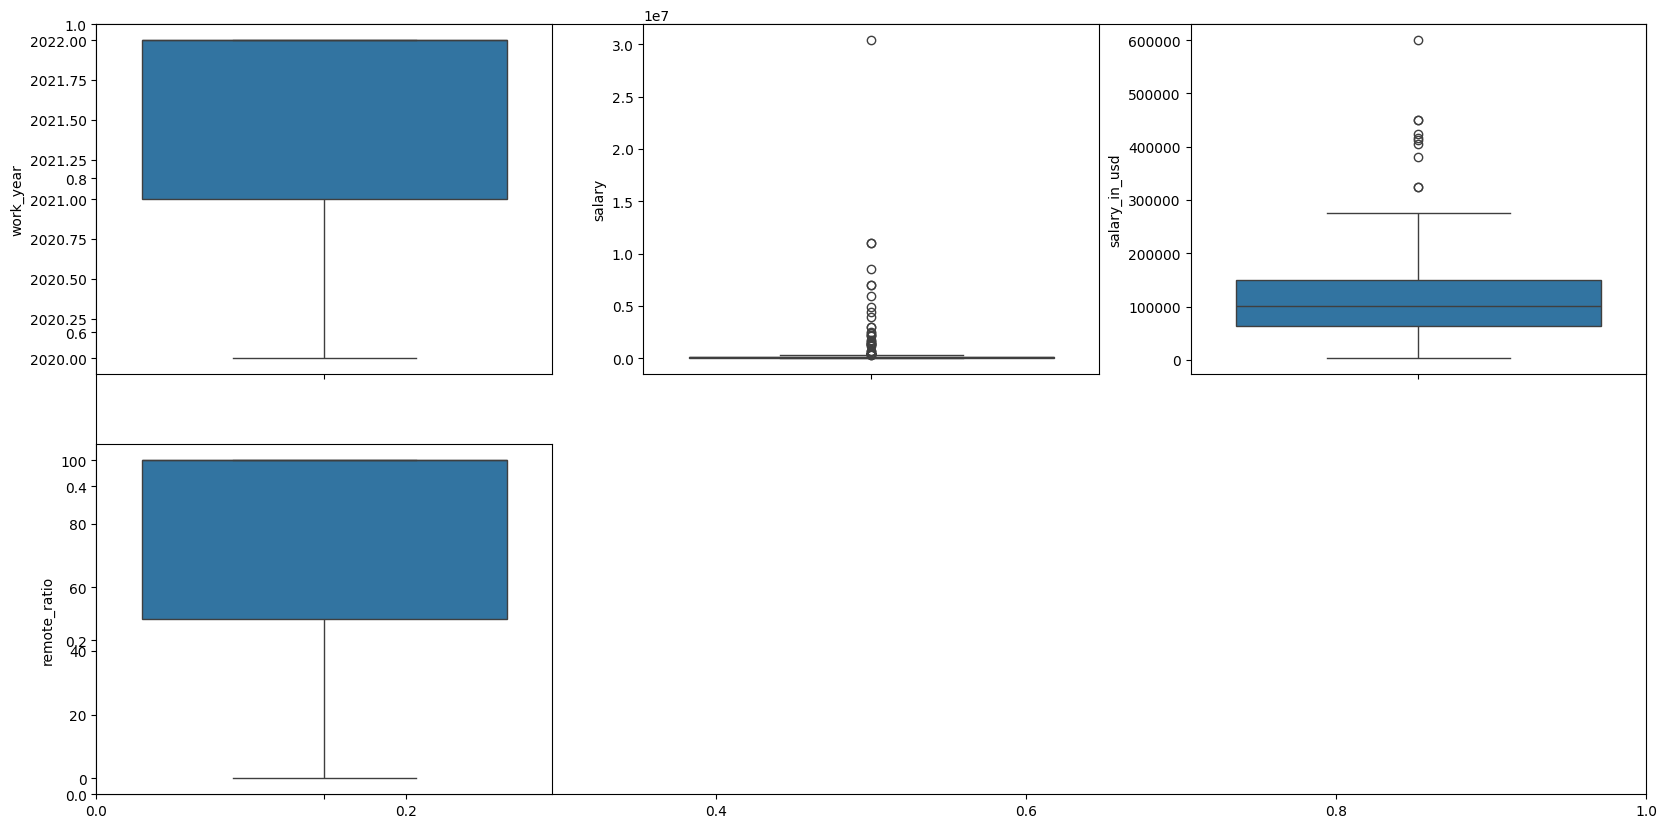

In [171]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()    

In [194]:
df['remote_ratio-work_year'] = df['remote_ratio'] - df['work_year']
df['salary-salary_in_usd'] = df['salary'] - df['salary_in_usd']
df['target']= np.where(df['salary'].shift(-1)>df['salary'],1,0)

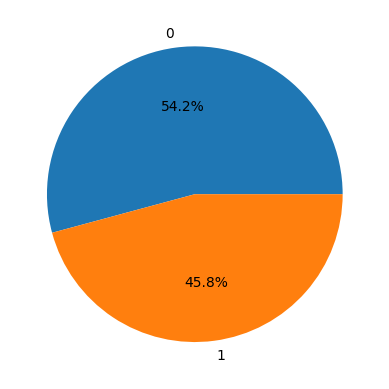

In [195]:
plt.pie(df['target'].value_counts().values,labels =[0,1], autopct = '%1.1f%%')
plt.show()

In [210]:
plt.figure(figsize =(10,20))

#as our cancern is the highly
#corrern features only so,we will visualize
#our heatmap as per that criteria only

sb.heatmap(df.corr() > 0.9, annot =True, cbar= False)
plt.show()

ValueError: could not convert string to float: 'MI'

<Figure size 1000x2000 with 0 Axes>